✅ Data Loaded Successfully!
Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-nul

/var/folders/db/vmzwsxrj7y9gqcmz573s_v9h0000gn/T/ipykernel_26160/1648430020.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="coolwarm")


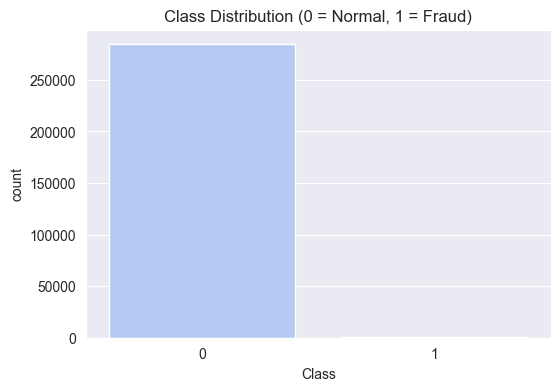


--- Class Distribution ---
Class
0    284315
1       492
Name: count, dtype: int64

Class Ratio:
 Class
0    99.827251
1     0.172749
Name: count, dtype: float64


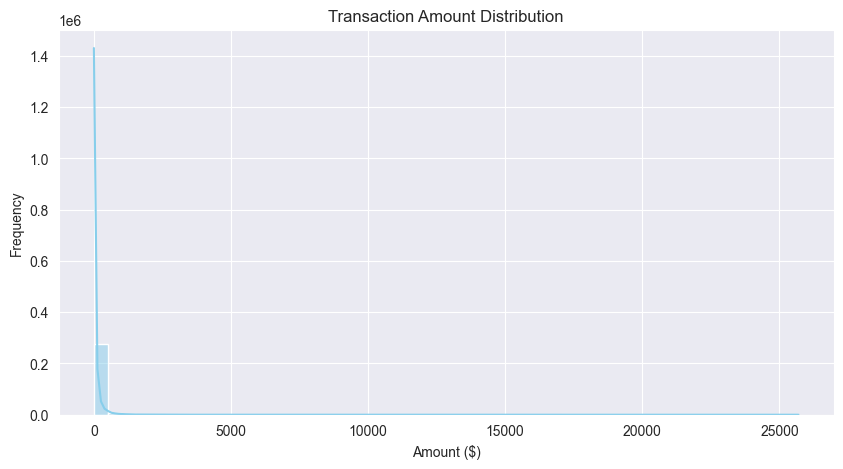

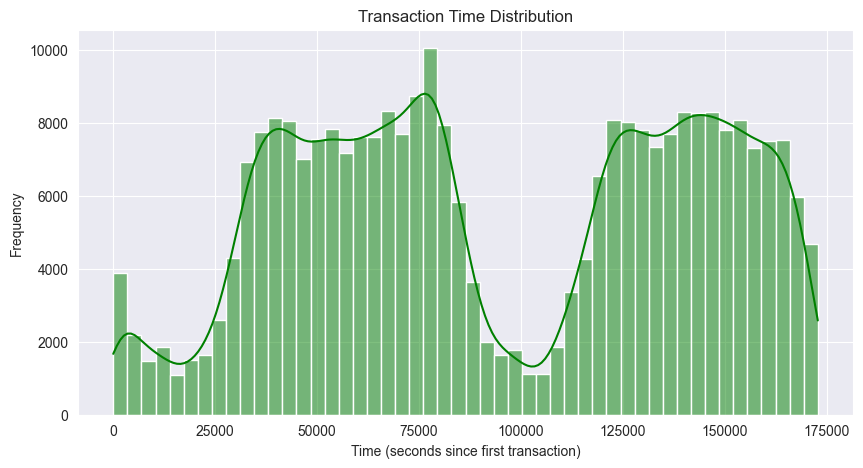

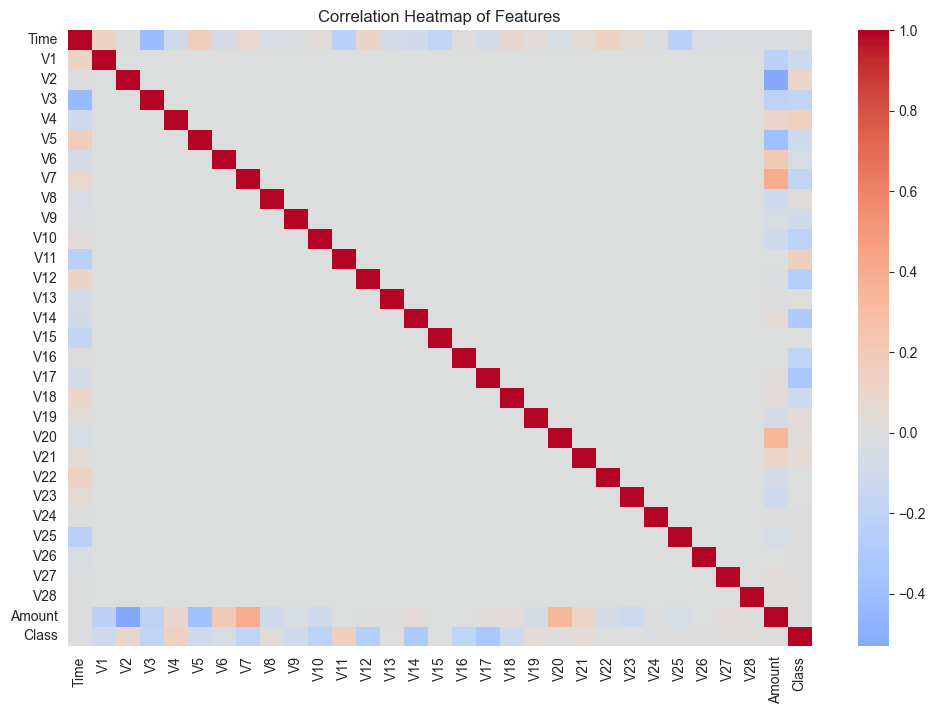


--- Top 10 Features Correlated with Class ---
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


/var/folders/db/vmzwsxrj7y9gqcmz573s_v9h0000gn/T/ipykernel_26160/1648430020.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df, palette="Set2")


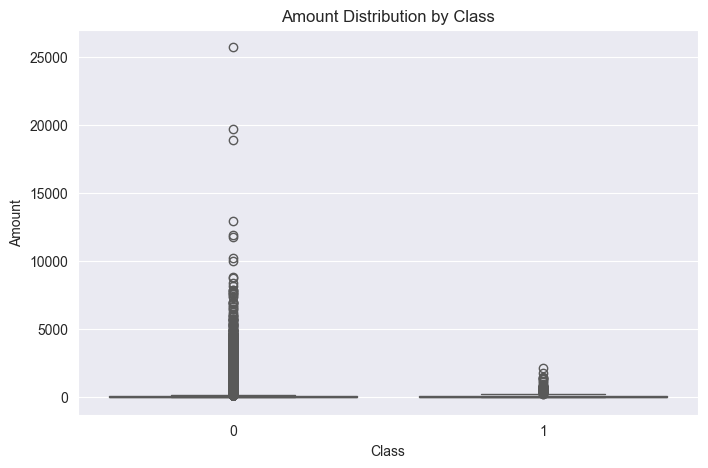


✅ Preprocessing Recommendations:

1. No missing values — ready for scaling and resampling.
2. Highly imbalanced classes — apply SMOTE / undersampling.
3. 'Amount' and 'Time' require scaling (StandardScaler or RobustScaler).
4. Features V1–V28 already standardized from PCA.
5. Consider feature engineering on 'Time' (hourly pattern).
6. Use stratified split during model training.



In [1]:
# =============================================
# 📊 Full Exploratory Data Analysis (EDA)
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# 1. Load dataset
# ---------------------------------------------
df = pd.read_csv("creditcard.csv")
print(" Data Loaded Successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# ---------------------------------------------
# 2. Basic Info
# ---------------------------------------------
print("\n--- Basic Info ---")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nData Types:\n", df.dtypes.value_counts())

# ---------------------------------------------
# 3. Statistical Summary
# ---------------------------------------------
print("\n--- Statistical Summary ---")
print(df.describe().T.head(10))

# ---------------------------------------------
# 4. Class Distribution
# ---------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="coolwarm")
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

class_counts = df["Class"].value_counts()
print("\n--- Class Distribution ---")
print(class_counts)
print("\nClass Ratio:\n", (class_counts / len(df)) * 100)

# ---------------------------------------------
# 5. Transaction Amount Distribution
# ---------------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["Amount"], bins=50, kde=True, color="skyblue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

# ---------------------------------------------
# 6. Transaction Time Distribution
# ---------------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["Time"], bins=50, kde=True, color="green")
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()

# ---------------------------------------------
# 7. Correlation Heatmap (sample for speed)
# ---------------------------------------------
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

# ---------------------------------------------
# 8. Top 10 correlated features with Class
# ---------------------------------------------
top_corr = corr["Class"].sort_values(ascending=False).head(10)
print("\n--- Top 10 Features Correlated with Class ---")
print(top_corr)

# ---------------------------------------------
# 9. Distribution of Amount by Class
# ---------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount", data=df, palette="Set2")
plt.title("Amount Distribution by Class")
plt.show()

# ---------------------------------------------
# 10. Preprocessing Readiness Summary
# ---------------------------------------------
print("\n✅ Preprocessing Recommendations:")
print("""
1. No missing values — ready for scaling and resampling.
2. Highly imbalanced classes — apply SMOTE / undersampling.
3. 'Amount' and 'Time' require scaling (StandardScaler or RobustScaler).
4. Features V1–V28 already standardized from PCA.
5. Consider feature engineering on 'Time' (hourly pattern).
6. Use stratified split during model training.
""")
